In [0]:

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 


import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns                   
sns.set_style("whitegrid") 


import plotly.graph_objs as go
 # Required to use plotly offline in jupyter notebook

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [0]:
df_export = pd.read_csv('https://raw.githubusercontent.com/agrwlnitika/Data-Analysis/master/India%20Afghanistan%20Trade%20Relations/Afghanistan_export.csv')
df_import = pd.read_csv('https://raw.githubusercontent.com/agrwlnitika/Data-Analysis/master/India%20Afghanistan%20Trade%20Relations/Afghanistan_import.csv')

In [3]:

bold('**Preview of Export Data:**')
display(df_export.sample(n=5))
bold('**Preview of Import Data:**')
display(df_import.sample(n=5))

**Preview of Export Data:**

,HSCode,Commodity,value,country,year
771,90,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",7.25,AFGHANISTAN TIS,2018
770,88,"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",0.56,AFGHANISTAN TIS,2018
569,54,MAN-MADE FILAMENTS.,34.79,AFGHANISTAN TIS,2016
558,38,MISCELLANEOUS CHEMICAL PRODUCTS.,0.83,AFGHANISTAN TIS,2016
354,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,0.00,AFGHANISTAN TIS,2014


**Preview of Import Data:**

,HSCode,Commodity,value,country,year
188,17,SUGARS AND SUGAR CONFECTIONERY.,0.05,AFGHANISTAN TIS,2013
119,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,NaN,AFGHANISTAN TIS,2015
64,48,"PAPER AND PAPERBOARD; ARTICLES OF PAPER PULP, ...",NaN,AFGHANISTAN TIS,2016
311,18,COCOA AND COCOA PREPARATIONS.,0.00,AFGHANISTAN TIS,2010
68,63,OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLO...,NaN,AFGHANISTAN TIS,2016


In [0]:
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary

In [5]:
bold('**Variable Description of export dataset:**')
display(description(df_export))

bold('**Variable Description of import dataset:**')
display(description(df_import))

**Variable Description of export dataset:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,96,2,3,4
1,Commodity,object,0,96,MEAT AND EDIBLE MEAT OFFAL.,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...
2,value,float64,53,337,1.4,0.08,3.89
3,country,object,0,1,AFGHANISTAN TIS,AFGHANISTAN TIS,AFGHANISTAN TIS
4,year,int64,0,9,2010,2010,2010


**Variable Description of import dataset:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,69,5,7,8
1,Commodity,object,0,69,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...
2,value,float64,102,79,0,12.38,268.6
3,country,object,0,1,AFGHANISTAN TIS,AFGHANISTAN TIS,AFGHANISTAN TIS
4,year,int64,0,9,2018,2018,2018


In [6]:

bold('**Export Data with zeros:**')
display(df_export[df_export.value == 0].head(3))
bold('**Import Data with zeros:**')
display(df_import[df_import.value == 0].head(3))
bold('**Export Data with NAN:**')
display(df_export.isnull().sum())
bold('**Import Data with NAN:**')
display(df_import.isnull().sum())

**Export Data with zeros:**

,HSCode,Commodity,value,country,year
14,16,"PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...",0.0,AFGHANISTAN TIS,2010
21,23,RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; P...,0.0,AFGHANISTAN TIS,2010
31,35,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,0.0,AFGHANISTAN TIS,2010


**Import Data with zeros:**

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.0,AFGHANISTAN TIS,2018
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.0,AFGHANISTAN TIS,2018
11,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,0.0,AFGHANISTAN TIS,2018


**Export Data with NAN:**

HSCode        0
Commodity     0
value        53
country       0
year          0
dtype: int64

**Import Data with NAN:**

HSCode         0
Commodity      0
value        102
country        0
year           0
dtype: int64

In [0]:

df_import = df_import.dropna()
df_import['country'] = df_import['country'].replace({'U S A': 'USA'})
df_import = df_import.reset_index(drop=True)

df_export = df_export.dropna()
df_export['country'] = df_export['country'].replace({'U S A': 'USA'})
df_export = df_export.reset_index(drop=True)

In [8]:

exp_year = df_export.groupby('year').agg({'value': 'sum'})
exp_year = exp_year.rename(columns={'value': 'Export'})
imp_year = df_import.groupby('year').agg({'value': 'sum'})
imp_year = imp_year.rename(columns={'value': 'Import'})


exp_year['Growth Rate(E)'] = exp_year.pct_change()
imp_year['Growth Rate(I)'] = imp_year.pct_change()


total_year = pd.concat([exp_year, imp_year], axis = 1)
total_year['Trade Deficit'] = exp_year.Export - imp_year.Import

bold('**Export/Import and Trade Balance of India**')
display(total_year)
bold('**Descriptive statistics**')
display(total_year.describe())

**Export/Import and Trade Balance of India**

,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
year,,,,,
2010,422.31,NaN,146.01,NaN,276.30
2011,510.81,0.209562,132.49,-0.092596,378.32
2012,472.55,-0.074901,159.53,0.204091,313.02
2013,474.26,0.003619,208.76,0.308594,265.50
2014,422.48,-0.109181,261.92,0.254646,160.56
2015,526.51,0.246237,615.80,1.351100,-89.29
2016,506.26,-0.038461,292.90,-0.524359,213.36
2017,709.66,0.401770,433.77,0.480949,275.89
2018,715.35,0.008018,435.44,0.003850,279.91


**Descriptive statistics**

,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
count,9.000000,8.000000,9.000000,8.000000,9.000000
mean,528.910000,0.080833,298.513333,0.248284,230.396667
std,110.187797,0.182359,164.802052,0.541016,134.134016
min,422.310000,-0.109181,132.490000,-0.524359,-89.290000
25%,472.550000,-0.047571,159.530000,-0.020262,213.360000
50%,506.260000,0.005818,261.920000,0.229369,275.890000
75%,526.510000,0.218730,433.770000,0.351683,279.910000
max,715.350000,0.401770,615.800000,1.351100,378.320000


In [9]:

# create trace1

trace1 = go.Bar(
                x = total_year.index,
                y = total_year.Export,
                name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(1,1,1)',width=1.5)),
                text = total_year.Export)
# create trace2 
trace2 = go.Bar(
                x = total_year.index,
                y = total_year.Import,
                name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(2,22,800)',width=1.5)),
                text = total_year.Import)
layout = go.Layout(hovermode= 'closest', title = 'Export/Import of Indian Trade to Afghanistan from 2010 to 2018' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()


In [10]:

# create trace1
trace1 = go.Scatter(
                x = total_year.index,
                y = total_year['Growth Rate(E)'],
                name = "Growth Rate(E)",
                line_color='deepskyblue',
                opacity=0.8,
                text = total_year['Growth Rate(E)'])
# create trace2 
trace2 = go.Scatter(
                x = total_year.index,
                y = total_year['Growth Rate(I)'],
                name = "Growth Rate(I)",
                line_color='dimgray',
                opacity=0.8,
                text = total_year['Growth Rate(I)'])


layout = go.Layout(hovermode= 'closest', title = 'Export/Import Growth Rate of Indian Trade to Afghanistan from 2010 to 2018' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Growth Rate'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()


In [11]:

trace1 = go.Bar(
                x = total_year.index,
                y = total_year.Export,
                name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export)
# create trace2 
trace2 = go.Bar(
                x = total_year.index,
                y = total_year.Import,
                name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Import)



# create trace3
trace3 = go.Bar(
                x = total_year.index,
                y = total_year['Trade Deficit'],
                name = "Trade Deficit",
                marker = dict(color = 'crimson',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year['Trade Deficit'])

layout = go.Layout(hovermode= 'closest', title = 'Export/Import and Trade Deficit of Indian Trade from 2010 to 2018' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [trace1, trace2, trace3], layout = layout)
fig.show()

In [12]:

print('Total number of Export commodity:', df_export['Commodity'].nunique())
print('Total number of Import commodity:', df_import['Commodity'].nunique())

Total number of Export commodity: 95
Total number of Import commodity: 63


In [13]:

exp_comm= df_export.groupby('Commodity').agg({'value': 'sum'}).reset_index()
exp_comm=exp_comm.sort_values(by='value', ascending=False)
exp_comm=exp_comm[:20]
display(exp_comm)

imp_comm = df_import.groupby('Commodity').agg({'value':'sum'}).reset_index()
imp_comm = imp_comm.sort_values(by = 'value', ascending = False)
imp_comm=imp_comm[:20]
display(imp_comm)

,Commodity,value
39,MAN-MADE FILAMENTS.,910.26
6,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...",605.27
61,PHARMACEUTICAL PRODUCTS,501.07
5,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...",383.90
84,TOBACCO AND MANUFACTURED TOBACCO SUBSTITUTES.,351.77
40,MAN-MADE STAPLE FIBRES.,269.01
7,ARTICLES OF IRON OR STEEL,197.67
22,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,145.03
50,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",141.98
2,ALUMINIUM AND ARTICLES THEREOF.,113.74


,Commodity,value
15,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,1650.68
23,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",661.16
12,"COFFEE, TEA, MATE AND SPICES.",168.89
16,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,139.72
32,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",44.03
41,"PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTH...",5.76
51,SALT; SULPHUR; EARTHS AND STONE; PLASTERING MA...,3.42
20,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,2.85
17,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,2.36
61,"WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YA...",2.06


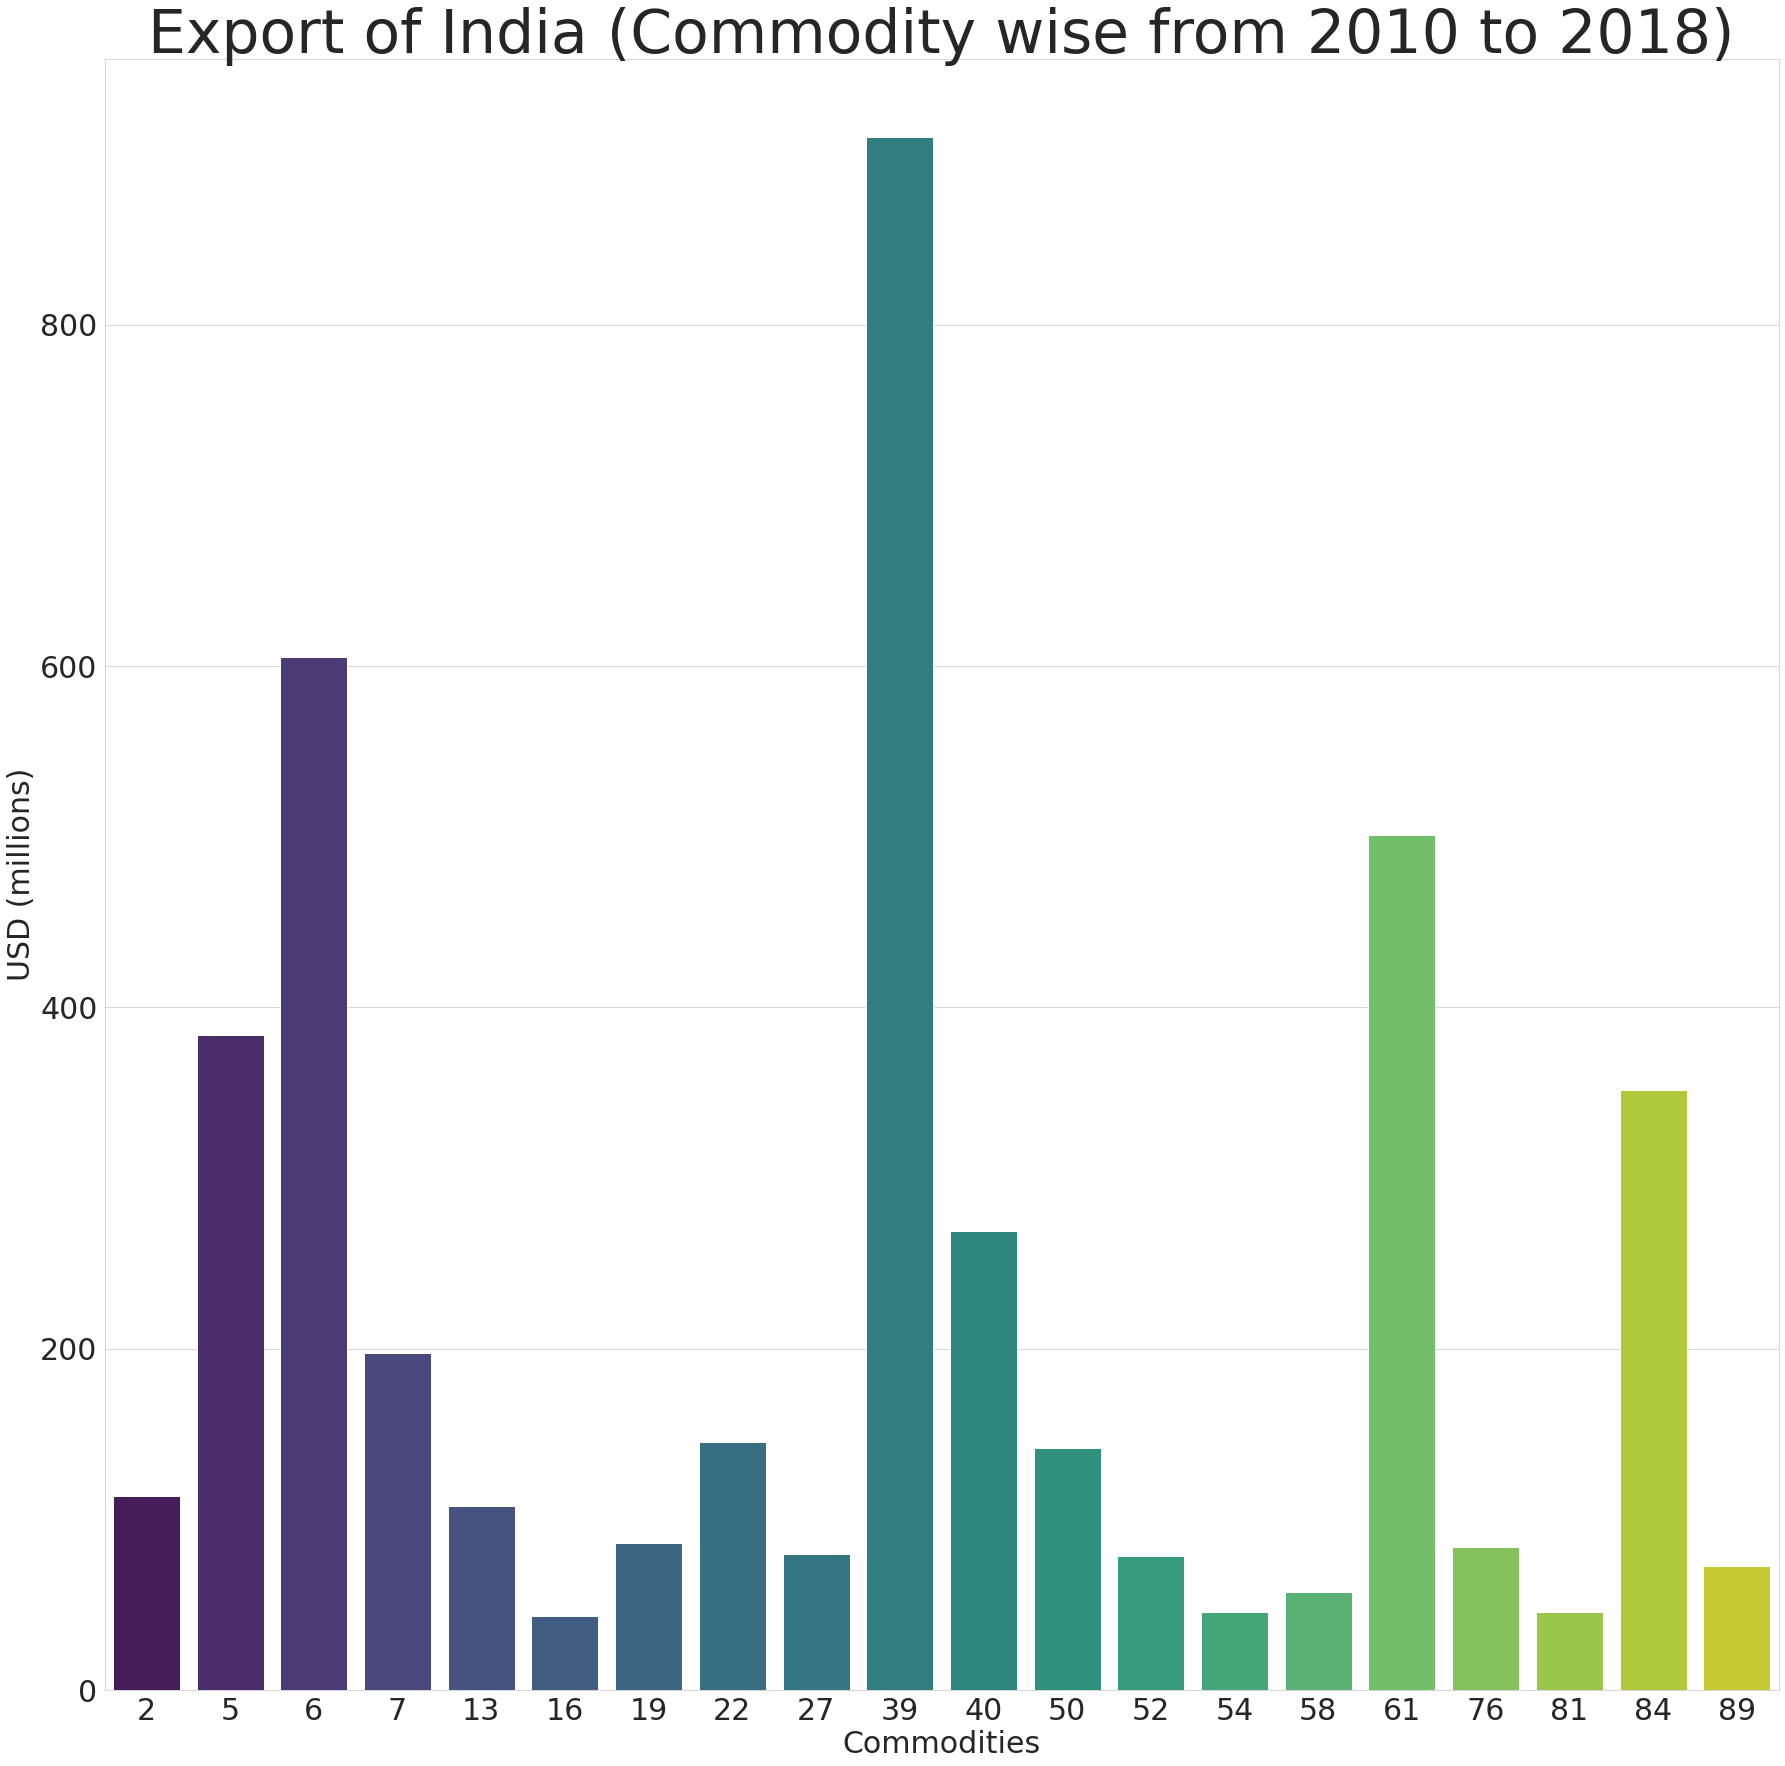

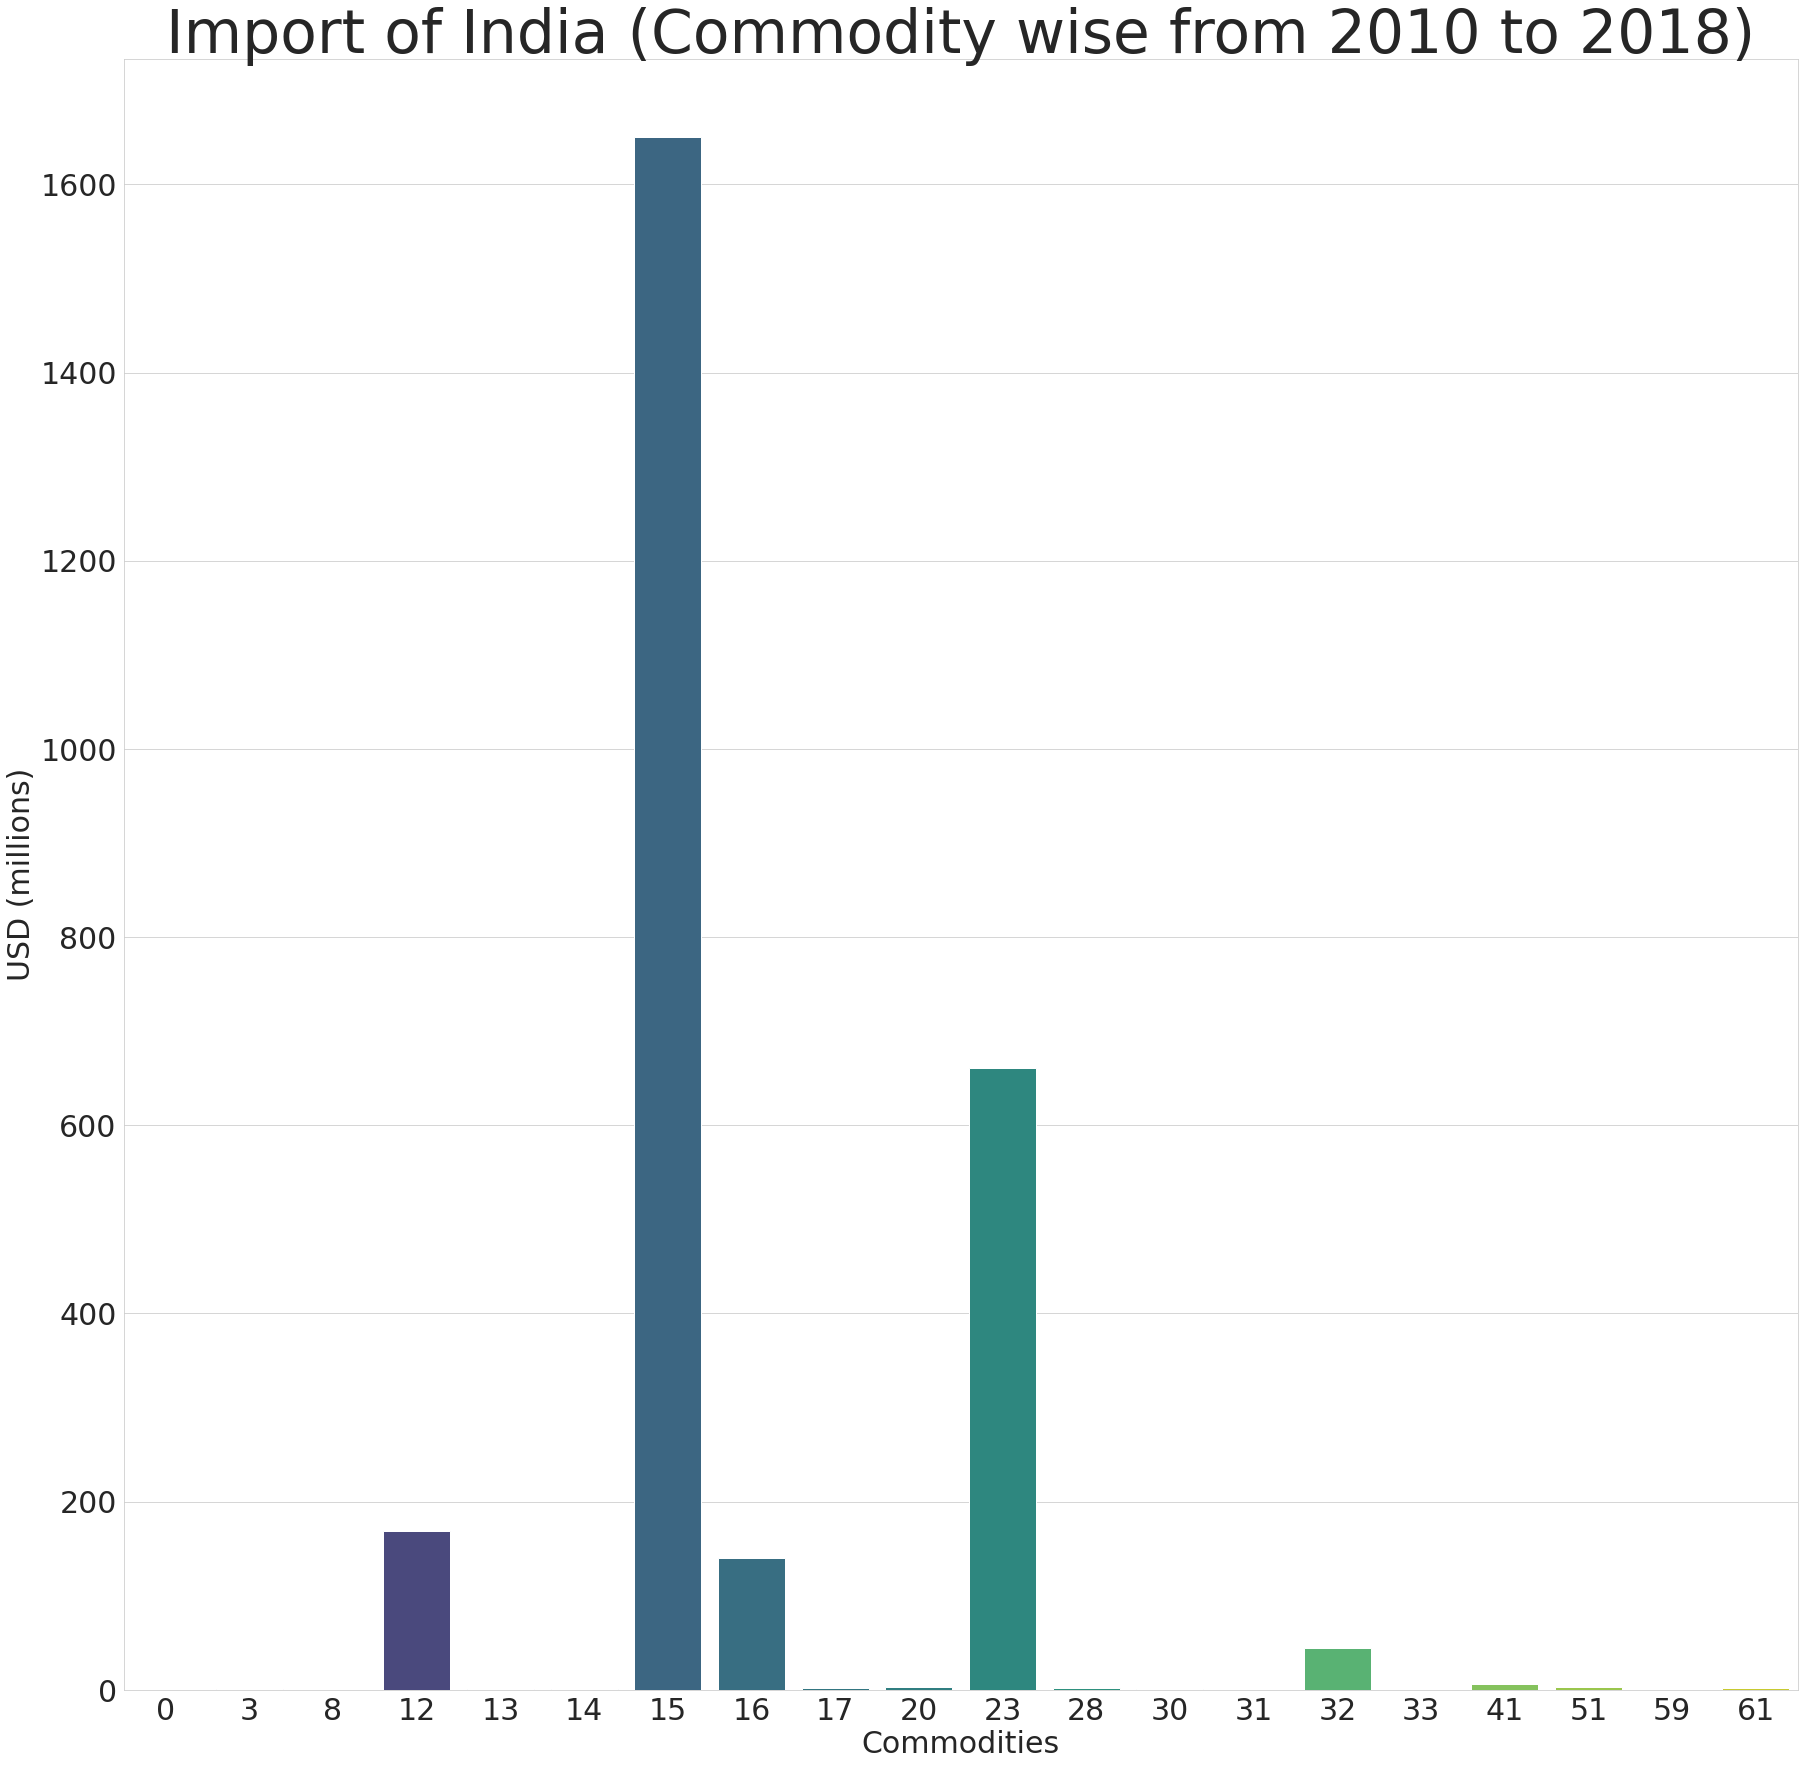

In [14]:

def bar_plot(x,y, xlabel, ylabel, label, color):
    global ax
    font_size = 30
    title_size = 60
    plt.rcParams['figure.figsize'] = (30, 30)
    ax = sns.barplot(x, y, palette = color)
    ax.set_xlabel(xlabel = xlabel, fontsize = font_size)
    ax.set_ylabel(ylabel = ylabel, fontsize = font_size)
    ax.set_title(label = label, fontsize = title_size)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()
  
bar_plot(exp_comm.index, exp_comm.value , 'Commodities','USD (millions)',  'Export of India (Commodity wise from 2010 to 2018)', 'viridis')
bar_plot(imp_comm.index, imp_comm.value, 'Commodities','USD (millions)', 'Import of India (Commodity wise from 2010 to 2018)', 'viridis')

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = total_year.index,
                y = total_year.Export,name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(5,5,5)',width=1.5)),
                text = total_year.Export))
fig.add_trace(go.Scatter(x = total_year.index,
                y = total_year.Import,name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(2,22,800)',width=1.5)),
                text = total_year.Import))
fig.update_layout(hovermode= 'closest', title = 'Export/Import of Indian Trade to Afghanistan from 2010 to 2018' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'USD (millions)'))
fig.show()


In [16]:

exp_comm_table = pd.pivot_table(df_export, values = 'value', index = 'Commodity', columns = 'year')
imp_comm_table = pd.pivot_table(df_import, values = 'value', index = 'Commodity', columns = 'year')
bold('**Commodity Composition of Exports**')
display(exp_comm_table.sample(n=20))
bold('**Commodity Composition of Imports**')
display(imp_comm_table.sample(n=5))

**Commodity Composition of Exports**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Commodity,,,,,,,,,
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,0.03,0.08,0.09,0.15,0.17,0.14,0.11,0.12,0.01
"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",0.00,NaN,0.01,0.00,0.00,10.95,0.00,NaN,0.56
LEAD AND ARTICLES THEREOF.,0.00,NaN,0.01,NaN,NaN,NaN,NaN,NaN,0.00
EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.,0.12,0.43,0.37,0.13,0.04,0.18,0.21,5.88,25.01
MISCELLANEOUS ARTICLES OF BASE METAL.,0.34,0.65,0.66,0.52,0.32,0.39,0.59,0.74,1.15
VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUCTS NOT ELSEWHERE SPECIFIED OR INCLUDED.,0.01,0.03,0.01,0.01,NaN,0.02,0.02,0.08,NaN
"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.",0.08,0.28,0.30,0.02,0.07,0.05,0.01,0.00,0.00
CARPETS AND OTHER TEXTILE FLOOR COVERINGS.,0.07,0.16,0.07,0.06,0.04,0.30,0.05,0.00,0.03
FERTILISERS.,NaN,NaN,NaN,NaN,NaN,0.00,6.29,NaN,0.00


**Commodity Composition of Imports**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Commodity,,,,,,,,,
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.",NaN,NaN,NaN,0.00,NaN,0.01,NaN,NaN,NaN
MISCELLANEOUS MANUFACTURED ARTICLES.,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
"PAPER AND PAPERBOARD; ARTICLES OF PAPER PULP, OF PAPER OR OF PAPERBOARD.",NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,NaN
SILK,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MISCELLANEOUS GOODS.,0.00,0.00,NaN,0.01,0.02,0.91,0.01,NaN,NaN


**Trend of the Most Exporting Good(In Values) From 2010 to 2018**

Text(0.5, 1.0, 'Trend of Man-Made Filaments')

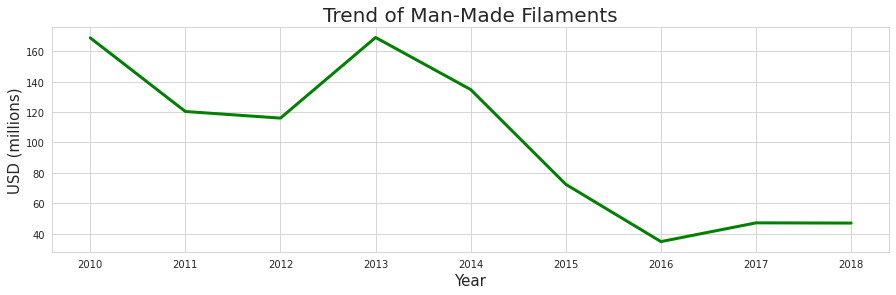

In [17]:

bold('**Trend of the Most Exporting Good(In Values) From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = exp_comm_table.loc["MAN-MADE FILAMENTS."].plot(color='green', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Man-Made Filaments', size = 20)





**Trend of the Most Importing Goods(In Values) From 2010 to 2018**

Text(0.5, 1.0, 'Trend of Groundnuts')

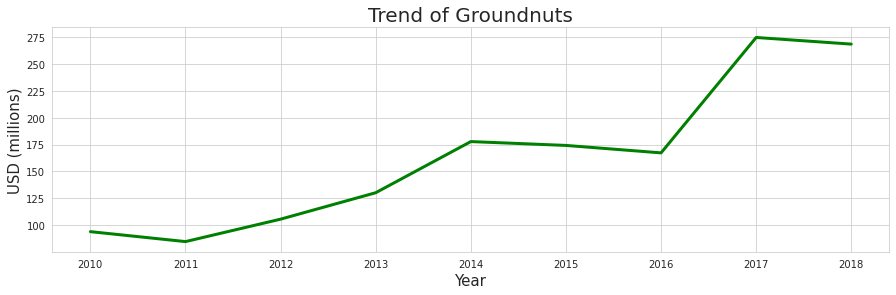

In [18]:

bold('**Trend of the Most Importing Goods(In Values) From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = imp_comm_table.loc["EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS."].plot(color='green', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Groundnuts', size = 20)
